https://stepik.org/lesson/1576194/step/5

(128, 128)

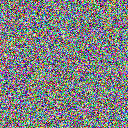

torch.Size([3, 224, 224])


In [ ]:
# @title Решение
import torch
from torchvision import models
import torchvision.transforms.functional as TF

# тензор x и img_pil в программе не менять
x = torch.randint(0, 255, (3, 128, 128), dtype=torch.float32)
img_pil = TF.to_pil_image(x)
display(img_pil.size, img_pil) # глянуть на картинку

transforms = models.ResNet50_Weights.DEFAULT.transforms()
inp_img = transforms(img_pil)
print(inp_img.shape)

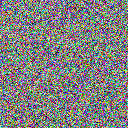

poncho: 0.0499
nematode: 0.0263
cardigan: 0.0099
stole: 0.0086
wall clock: 0.0086


In [ ]:
# @title Иллюстрация
import torch
from torchvision import models
import torchvision.transforms.functional as TF

# тензор x и img_pil в программе не менять
x = torch.randint(0, 255, (3, 128, 128), dtype=torch.float32)
img_pil = TF.to_pil_image(x)
display(img_pil)

# Нам в конце для иллюстрации отдельно понадобится этот объект:
resnet_weights = models.ResNet50_Weights.DEFAULT

# теперь можно загрузиться через него:
model = models.resnet50(weights=resnet_weights)

# Информация о классах в этом словаре (тоже для иллюстрации):
cats = resnet_weights.meta['categories']

# Трансформации находятся здесь:
transforms = resnet_weights.transforms()

model.eval()

# Применяем трансформации сети ResNet50 к входному сигралу:
inp_img = transforms(img_pil)

# Для иллюстрации:
# Пропускаем тензор img через сеть ResNet50:
model.eval()
out = model(inp_img.unsqueeze(0)) # (1000) плюс добавляем первую ось

res = out.softmax(dim=1).sort(descending=True)
resnet_weights = models.ResNet18_Weights.DEFAULT
cats = resnet_weights.meta['categories']
for s, i in zip(res[0][0][:5], res[1][0][:5]):
    print(f"{cats[i]}: {s:.4f}")